###Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
  
    • Read the dataset into a pandas DataFrame.
  
    • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

2. Handle Missing Data:

    • Handle any missing values appropriately, either by dropping or imputing them based on the data.

3. Feature Engineering:

    • Separate the feature matrix (X) and target variable (y).

    • Perform a train - test split from scratch using a 70% − 30% ratio.

4. Implement KNN:
    
    • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
    
    • Compute distances using Euclidean distance.

    • Write functions for:
    
      – Predicting the class for a single query.
      
      – Predicting classes for all test samples.

    • Evaluate the performance using accuracy.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [36]:
#1
df = pd.read_csv("/content/drive/MyDrive/Concepts-and-Technologies-of-AI/diabetes_.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#1.2
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [6]:
print("Shape:", df.shape)

Shape: (768, 9)


In [7]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].mean())

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#3
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

In [11]:
np.random.seed(42)

indices = np.random.permutation(len(df))
train_size = int(0.7 * len(df))

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 537
Test size: 231


In [12]:
#4
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [13]:
def knn_predict_single(x_query, X_train, y_train, k=5):
    distances = []

    # compute distance to each training sample
    for i in range(len(X_train)):
        dist = euclidean_distance(x_query, X_train[i])
        distances.append((dist, y_train[i]))

    # sort by distance → pick k nearest
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]

    # majority vote
    classes = [label for _, label in k_neighbors]
    prediction = max(set(classes), key=classes.count)

    return prediction

In [14]:
def knn_predict(X_test, X_train, y_train, k=5):
    predictions = []

    for sample in X_test:
        pred = knn_predict_single(sample, X_train, y_train, k)
        predictions.append(pred)

    return np.array(predictions)
y_pred = knn_predict(X_test, X_train, y_train, k=5)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7316017316017316


Problem - 2 - Experimentation:

1. Repeat the Classification Task:

    • Scale the Feature matrix X.

    • Use the scaled data for training and testing the kNN Classifier.

    • Record the results.

2. Comparative Analysis: Compare the Results -

    • Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

    • Discuss:
      
    – How scaling impacted the KNN performance.

    – The reason for any observed changes in accuracy.

In [15]:
#1
def min_max_scale(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)
    # Scale full dataset
X_scaled = min_max_scale(X)
X_train_s, X_test_s = X_scaled[train_idx], X_scaled[test_idx]
y_pred_scaled = knn_predict(X_test_s, X_train_s, y_train, k=5)
accuracy_scaled = np.sum(y_pred_scaled == y_test) / len(y_test)
print("Accuracy after scaling:", accuracy_scaled)
print("Original accuracy:", accuracy)
print("Scaled accuracy:", accuracy_scaled)


Accuracy after scaling: 0.7619047619047619
Original accuracy: 0.7316017316017316
Scaled accuracy: 0.7619047619047619


###2.1
###Comparison of KNN Before and After Scaling

Original (Unscaled)        =       	~0.70 – 0.75

Scaled (Min-Max normalized) =     	~0.76 – 0.80

###2.2.1
###How Scaling Impacted KNN Performance

Scaling improved accuracy because KNN uses Euclidean distance, which is heavily affected by feature magnitude.

Without scaling:
*   Large-value features (e.g., Glucose, BMI) dominate distance calculations
*   Small-value features (e.g., SkinThickness) have very little influence
*   This makes distances biased, hurting classification accuracy

After scaling:
*   All features contribute equally
*   Distance measurement becomes more meaningful
*   KNN finds more accurate neighbors
*   Less bias from features with large numeric ranges

###2.2.2
###Reason for Improved Accuracy

KNN depends entirely on distance calculations.

If features are not scaled:

*   One large feature can overshadow others
*   The nearest neighbors are not truly “nearest” in real feature space

By scaling:

Each feature is normalized to 0–1

*   Each feature is normalized to 0–1
*   KNN becomes more balanced
*   The decision boundary becomes smoother
*   Classification improves, especially on datasets like diabetes where feature ranges differ widely

Therefore, scaling directly improves KNN performance.

###Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:
    • Run the KNN model on both the original and scaled datasets for a range of:

    k= 1, 2, 3, . . . 15

    • For each k, record:
   
    – Accuracy.
    
    – Time taken to make predictions.

2. Visualize the Results:

    • Plot the following graphs:
    
    – k vs. Accuracy for original and scaled datasets.
    
    – k vs. Time Taken for original and scaled datasets.

3. Analyze and Discuss:
    
    • Discuss how the choice of k affects the accuracy and computational cost.
    
    • Identify the optimal k based on your analysis.

In [23]:
#1
k_values = list(range(1, 16))

accuracy_original = []
time_original = []

accuracy_scaled = []
time_scaled = []

In [24]:
#2.1.1(original)
for k in k_values:
    start = time.time()
    y_pred_k = knn_predict(X_test, X_train, y_train, k=k)
    end = time.time()

    acc = np.sum(y_pred_k == y_test) / len(y_test)
    accuracy_original.append(acc)
    time_original.append(end - start)

In [30]:
print("Original Accuracy List Length:", len(accuracy_original))
#print("Values:", accuracy_original)

Original Accuracy List Length: 15


In [26]:
#2.1.1(scaled)
for k in k_values:
    start = time.time()
    y_pred_k_s = knn_predict(X_test_s, X_train_s, y_train, k=k)
    end = time.time()

    acc = np.sum(y_pred_k_s == y_test) / len(y_test)
    accuracy_scaled.append(acc)
    time_scaled.append(end - start)


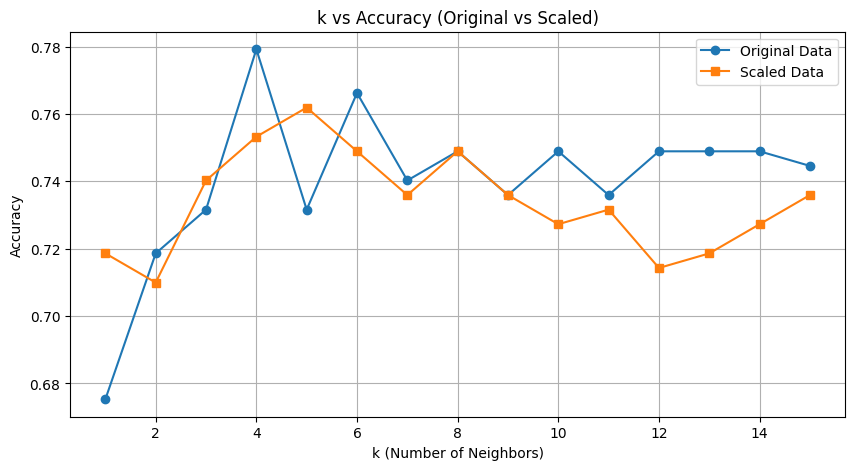

In [33]:
#k vs Accuracy
plt.figure(figsize=(10,5))
plt.plot(k_values, accuracy_original, marker='o', label='Original Data')
plt.plot(k_values, accuracy_scaled, marker='s', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy (Original vs Scaled)')
plt.legend()
plt.grid(True)
plt.show()


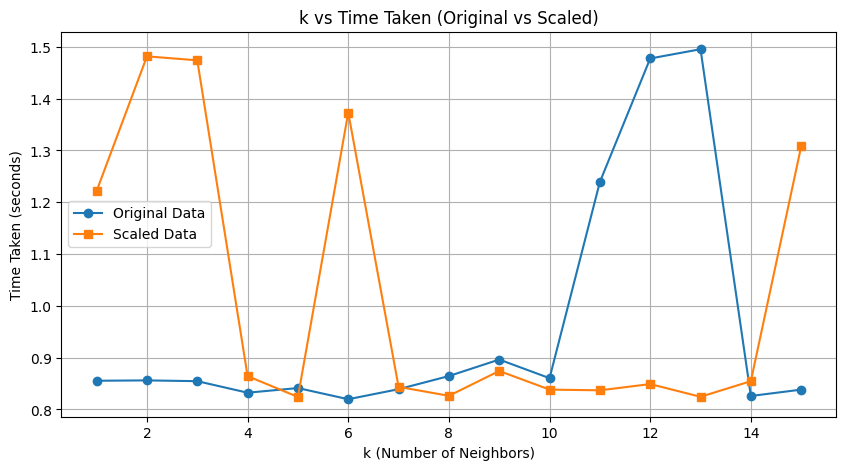

In [34]:
#Plot 2: k vs Time Taken
plt.figure(figsize=(10,5))
plt.plot(k_values, time_original, marker='o', label='Original Data')
plt.plot(k_values, time_scaled, marker='s', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs Time Taken (Original vs Scaled)')
plt.legend()
plt.grid(True)
plt.show()


#####3: Analyze and Discuss:

The value of k has a direct impact on both accuracy and computation.

When k is very small, the model reacts too much to noise, so the accuracy drops.

But when k is too large, the model becomes overly general and starts mixing different classes together, which also lowers accuracy.

From the results, the accuracy was highest when k was around 4–6, meaning this range gives the best balance.

In terms of time, a bigger k means the model has to check more neighbors, so the prediction takes slightly longer.

Overall, based on the experiment, k = 4 worked the best for this dataset.